<a href="https://colab.research.google.com/github/shubham10693/Admission-Predictor/blob/master/Toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords          
from google.colab import files
from nltk.stem import WordNetLemmatizer   
from nltk.corpus import stopwords       
from nltk.stem import PorterStemmer  
lemmatizer = WordNetLemmatizer()

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
train.shape

(159571, 8)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [14]:
test.shape

(153164, 2)

In [15]:
length = train['comment_text'].str.len()

print("Max length of a string is {}".format(length.max()))
print("Mean length of a string is {}".format(length.mean()))
print("Minimum length of a string is {}".format(length.min()))

Max length of a string is 5000
Mean length of a string is 394.0732213246768
Minimum length of a string is 6


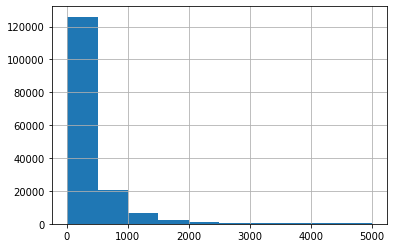

In [16]:
length.hist()

In [17]:
#Check for any null comments in the dataset
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [19]:
y_features = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y = train[y_features].values

**Data Preprocessing**


In [76]:
train['comment_text'] = train['comment_text'].apply(lambda x:x.lower())

In [77]:
train['comment_text'].head(10)

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
5    "\n\ncongratulations from me as well, use the ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [79]:
#Remove HTML tags
def html_tags(input_str):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    clean = re.sub(html,'', str(input_str))
    return clean

In [80]:
train['comment_text'] = train['comment_text'].apply(lambda x:html_tags(x))

In [81]:
train['comment_text'].head(10)

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
5    "\n\ncongratulations from me as well, use the ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word 'nonsense' was offensive to ...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [88]:
#Remove Punctuation tags
def punct_tags(input_str):
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", str(input_str))

In [89]:
train['comment_text'] = train['comment_text'].apply(lambda x:punct_tags(x))

In [90]:
train['comment_text'].head(10)

0    explanation\nwhy the edits made under my usern...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    \nmore\ni cant make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
5    \n\ncongratulations from me as well use the to...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [91]:
#Remove \n
def remove_space(input_str):
    return re.sub(r'\n','',str(input_str))

In [92]:
train['comment_text'] = train['comment_text'].apply(lambda x:remove_space(x))

In [93]:
train['comment_text'].head(10)

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
5    congratulations from me as well use the tools ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

In [49]:
def lower(input_str):
    return input_str.lower() 

In [105]:
train['comment_text'] = train['comment_text'].apply(lambda x:x.strip())


In [107]:
text.head(10)

0    explanationwhy the edits made under my usernam...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    morei cant make any real suggestions on improv...
4    you sir are my hero any chance you remember wh...
5    congratulations from me as well use the tools ...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: comment_text, dtype: object

Tokenization

In [112]:
from nltk.tokenize import word_tokenize
train['comment_text'] = train['comment_text'].apply(word_tokenize)
train['comment_text'].head(10)

0    [explanationwhy, the, edits, made, under, my, ...
1    [daww, he, matches, this, background, colour, ...
2    [hey, man, im, really, not, trying, to, edit, ...
3    [morei, cant, make, any, real, suggestions, on...
4    [you, sir, are, my, hero, any, chance, you, re...
5    [congratulations, from, me, as, well, use, the...
6    [cocksucker, before, you, piss, around, on, my...
7    [your, vandalism, to, the, matt, shirvington, ...
8    [sorry, if, the, word, nonsense, was, offensiv...
9    [alignment, on, this, subject, and, which, are...
Name: comment_text, dtype: object

In [113]:
stop = set(stopwords.words('english'))
print(stop)

{'our', 'their', 'that', 'needn', 'she', 'all', 'through', 'just', 'mustn', 'those', "mightn't", 'down', 'once', "you'd", 'these', 'by', 's', 'shan', 'such', 'into', 'ourselves', "don't", 'below', 'wouldn', 'to', 'will', 'a', 'few', 'the', 'from', 'for', 'because', 'can', 'they', "wouldn't", 'no', 'are', 'this', "she's", 'been', 'more', 'not', 'isn', 'does', 'doing', 'haven', "shan't", 'with', 'has', 'myself', 'have', 'nor', 'who', 've', 'after', "hadn't", 'be', 'at', 'didn', 'is', 'same', 'but', 'weren', "aren't", 'him', 'and', 'between', 'having', 'had', 're', 'wasn', 'any', 'shouldn', 'it', 'theirs', "didn't", 'd', 'were', 'ours', "haven't", "isn't", 'm', 'off', 'you', 'doesn', 'should', 'here', 'me', 'he', 'further', 'o', 'aren', "won't", 'we', 'when', 'y', 'than', 'himself', 'yours', "should've", 'yourselves', 'out', "needn't", 'before', "shouldn't", 'which', 't', 'how', "you'll", "hasn't", 'so', 'i', 'whom', 'do', 'there', 'why', "you're", 'was', 'themselves', 'what', 'ain', "wer

In [116]:
train['comment_text'] = train['comment_text'].apply(lambda x: [word for word in x if word not in stop])  

In [117]:
train['comment_text'].head(10)

0    [explanationwhy, edits, made, username, hardco...
1    [daww, matches, background, colour, im, seemin...
2    [hey, man, im, really, trying, edit, war, guy,...
3    [morei, cant, make, real, suggestions, improve...
4           [sir, hero, chance, remember, page, thats]
5    [congratulations, well, use, tools, well, ·, t...
6                     [cocksucker, piss, around, work]
7    [vandalism, matt, shirvington, article, revert...
8    [sorry, word, nonsense, offensive, anyway, im,...
9            [alignment, subject, contrary, dulithgow]
Name: comment_text, dtype: object

In [118]:
#Stemming
def stemming(input_str):
    stemmer = nltk.PorterStemmer()
    stem = [stemmer.stem(i) for i in input_str]
    return stem

In [119]:
df2['comment_text'] = df2['comment_text'].apply(lambda x:stemming(x))
df2['comment_text'].head()

RecursionError: ignored